In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('finalmetrics.csv')
# replace any instance of 'x'' with NaN
df = df.replace('x', np.nan)
# rename "PoS - Ethereum" to "PoS"
df = df.rename(columns={"PoS - Ethereum": "PoS"})
df = df.rename(columns={"PoW - Bitcoin": "PoW"})
df = df.rename(columns={"Proof of Luck": "PoL"})
df = df.rename(columns={"PoA - Autobahn": "PoA"})
df = df.rename(columns={"Num Peers": "num_peers"})
df = df.rename(columns={"Chain Length": "chain_length"})

# force to numerics
df['PoS'] = pd.to_numeric(df['PoS'], errors='coerce')
df['PoW'] = pd.to_numeric(df['PoW'], errors='coerce')
df['PoL'] = pd.to_numeric(df['PoL'], errors='coerce')

# only take the first 12 rows (time)
time_df = df.iloc[:12, :]
time_df

,Metric,num_peers,chain_length,PoS,PoL,PoW,PoA,Unnamed: 7,Bitcoin times
0,Time (the time it takes n peers to reach conse...,10,5,25.340000,21.083333,131.61,25.25,vm01,Simulation started at 2025-05-01 20:12:06 and ...
1,NaN,10,10,50.346667,46.660000,206.73,50.31,vm03,Simulation started at 2025-05-01 20:12:35 and ...
2,NaN,10,50,250.530000,246.703333,521.14,250.49,vm05,Simulation started at 2025-05-01 20:34:28 and ...
3,NaN,30,5,25.343333,21.573333,192.00,25.24,vm01,Simulation started at 2025-05-01 20:14:53 and ...
4,NaN,30,10,50.353333,46.960000,351.79,50.28,vm07,Simulation started at 2025-05-01 20:16:31 and ...
5,NaN,30,50,250.566667,246.986667,447.73,250.55,vm09,Simulation started at 2025-05-01 20:17:59 and ...
6,NaN,50,5,25.356667,21.726667,227.66,25.28,vm09,Simulation started at 2025-05-01 20:58:12 and ...
7,NaN,50,10,50.386667,47.090000,277.46,50.38,vm13,Simulation started at 2025-05-01 20:26:46 and ...
8,NaN,50,50,250.636667,247.300000,1100.01,250.73,vm09,Simulation started at 2025-05-01 20:39:15 and ...
9,NaN,100,5,NaN,22.006667,115.06,25.80,vm07,Simulation started at 2025-05-01 21:01:23 and ...


In [3]:
def plot_stacked(df_to_plot, title):
    # Filter the data for the desired peer groups
    peer_groups = [10, 30, 50, 100]
    filtered_df = df_to_plot[df_to_plot["num_peers"].isin(peer_groups)]

    # Pivot the data to organize it for plotting
    pivot_df = filtered_df.pivot_table(
        index=["num_peers", "chain_length"], values=["PoS", "PoW", "PoL", "PoA"], aggfunc="sum"
    )

    # Create figure and axis
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots(figsize=(14, 8))

    # Define parameters for spacing
    bar_width = 0.6
    group_spacing = 2  # Increase this value to add more space between peer groups

    # Colors for different chain lengths
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(pivot_df.loc[peer_groups[0]].columns)))

    # Initialize variables for plotting
    x_tick_PoSitions = []
    current_PoS = 0

    # Get all mechanism types (assuming they're the same across peer groups)
    mechanism_types = pivot_df.loc[peer_groups[0]].index.get_level_values(0).unique()

    # Plot each peer group with spacing
    for i, peer_group in enumerate(peer_groups):
        group_data = pivot_df.loc[peer_group]

        # Store the middle PoSition of this peer group for labeling
        group_start = current_PoS

        # Plot bars for each mechanism type
        for j, mech_type in enumerate(mechanism_types):
            bottom = 0
            for k, chain_length in enumerate(group_data.columns):
                value = group_data.loc[mech_type, chain_length]
                ax.bar(
                    current_PoS,
                    value,
                    bottom=bottom,
                    width=bar_width,
                    color=colors[k],
                    label=f"{chain_length}" if i == 0 and j == 0 else "",
                    edgecolor="black",
                    linewidth=0.5,
                )
                bottom += value

            current_PoS += bar_width

        # Calculate the middle PoSition of this group for the x-tick
        middle_PoS = (group_start + current_PoS - bar_width) / 2
        x_tick_PoSitions.append(middle_PoS)

        # Add extra spacing after each peer group
        current_PoS += group_spacing

    # Set custom x-tick PoSitions and labels
    ax.set_xticks(x_tick_PoSitions)
    ax.set_xticklabels([f"{pg} Peers" for pg in peer_groups])
    ax.tick_params(
        axis="x", which="both", pad=10
    )  

    # Remove the original x-axis label
    ax.set_xlabel("")

    # Add labels and title
    plt.title(f"{title} for Different Chain Lengths Across Peer Groups")
    plt.ylabel("Time")

    # Add mechanism type labels below each group
    for i, peer_group in enumerate(peer_groups):
        # Calculate PoSitions for mechanism labels
        mech_PoSitions = []
        start_PoS = (
            x_tick_PoSitions[i] - (len(mechanism_types) * bar_width) / 2 + bar_width / 2
        )
        for j in range(len(mechanism_types)):
            mech_PoSitions.append(start_PoS + j * bar_width)

        # Add mechanism labels under each bar group
        for j, (PoS, mech) in enumerate(zip(mech_PoSitions, mechanism_types)):
            ax.text(PoS, -1, mech, ha="center", va="top", rotation=0, fontsize=9)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(
        handles, labels, title="Chain Length", bbox_to_anchor=(1.05, 1), loc="upper left"
    )

    # Adjust bottom margin to make room for mechanism labels
    plt.tight_layout(rect=[0, 0.05, 1, 0.98])

    plt.show()

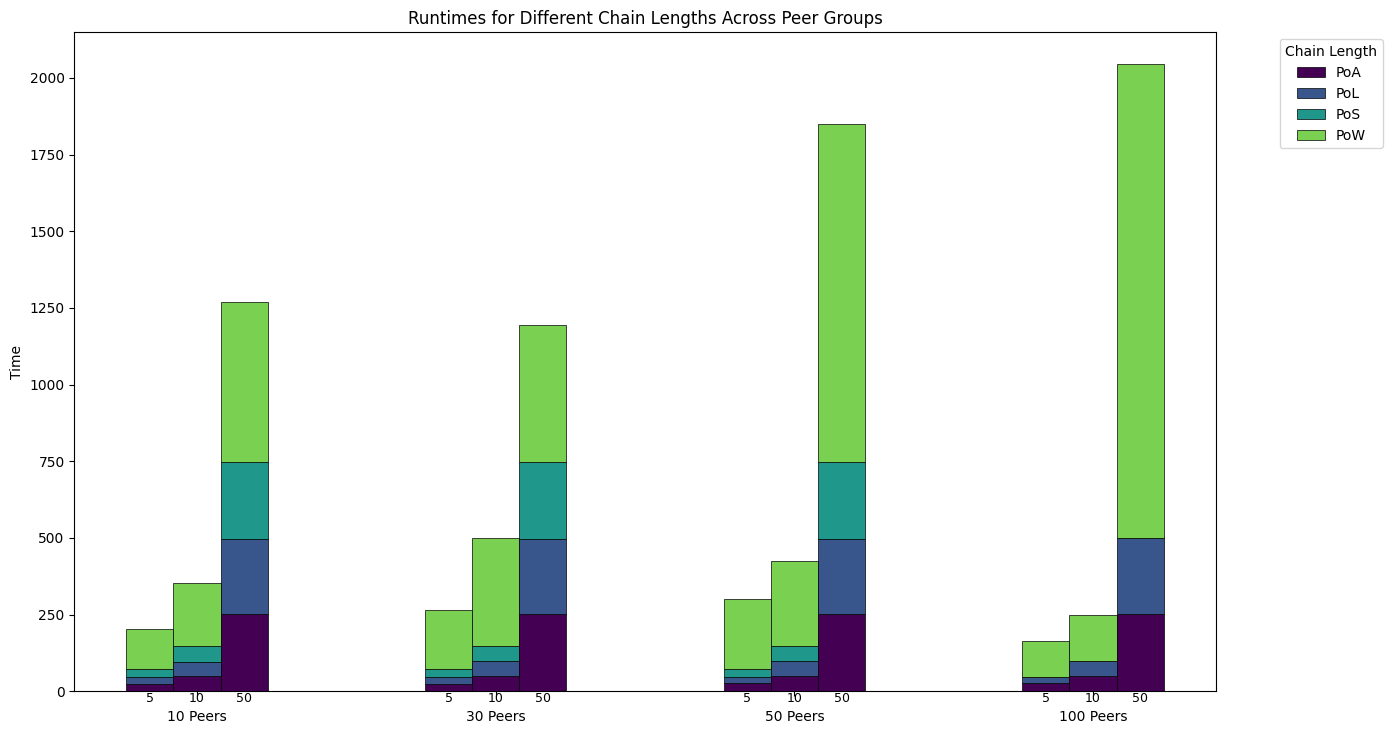

In [4]:
plot_stacked(time_df, "Runtimes")

In [8]:
df
avg_cpu_df = df.iloc[24:36, :]
# add a column for each of "PoS", "PoL", "PoA" that is "{name}_per_cpu" that is the value divided by the num_peers
avg_cpu_df["PoS_per_cpu"] = avg_cpu_df["PoS"] / avg_cpu_df["num_peers"]
avg_cpu_df["PoW_per_cpu"] = avg_cpu_df["PoW"] / avg_cpu_df["num_peers"]
avg_cpu_df["PoL_per_cpu"] = avg_cpu_df["PoL"] / avg_cpu_df["num_peers"]

# rename the old "PoS", "PoL", "PoA" to "PoS_total", "PoL_total", "PoA_total"
avg_cpu_df = avg_cpu_df.rename(columns={"PoS": "PoS_total"})
avg_cpu_df = avg_cpu_df.rename(columns={"PoW": "PoW_total"})
avg_cpu_df = avg_cpu_df.rename(columns={"PoL": "PoL_total"})

#rename is _per_cpu columns to "PoS", "PoL", "PoA"
avg_cpu_df = avg_cpu_df.rename(columns={"PoS_per_cpu": "PoS"})
avg_cpu_df = avg_cpu_df.rename(columns={"PoW_per_cpu": "PoW"})
avg_cpu_df = avg_cpu_df.rename(columns={"PoL_per_cpu": "PoL"})
avg_cpu_df

/var/folders/0s/tjhl7rkx6l3gpsq64sydp6lw0000gn/T/ipykernel_99302/2060441217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_cpu_df["PoS_per_cpu"] = avg_cpu_df["PoS"] / avg_cpu_df["num_peers"]
/var/folders/0s/tjhl7rkx6l3gpsq64sydp6lw0000gn/T/ipykernel_99302/2060441217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_cpu_df["PoW_per_cpu"] = avg_cpu_df["PoW"] / avg_cpu_df["num_peers"]
/var/folders/0s/tjhl7rkx6l3gpsq64sydp6lw0000gn/T/ipykernel_99302/2060441217.py:6: SettingWithCopyWarning: 
A val

,Metric,num_peers,chain_length,PoS_total,PoL_total,PoW_total,PoA,Unnamed: 7,Bitcoin times,PoS,PoW,PoL
24,Average CPU Usage (mHz),10,5,132.0,87.000000,2600.0,NaN,vm01,Simulation started at 2025-05-01 20:12:06 and ...,13.200000,260.000000,8.700000
25,NaN,10,10,147.0,80.944444,2572.0,NaN,vm03,Simulation started at 2025-05-01 20:12:35 and ...,14.700000,257.200000,8.094444
26,NaN,10,50,165.0,152.241453,2880.0,NaN,vm05,Simulation started at 2025-05-01 20:34:28 and ...,16.500000,288.000000,15.224145
27,NaN,30,5,220.0,150.833333,2738.0,NaN,vm01,Simulation started at 2025-05-01 20:14:53 and ...,7.333333,91.266667,5.027778
28,NaN,30,10,215.0,172.111111,2899.0,NaN,vm07,Simulation started at 2025-05-01 20:16:31 and ...,7.166667,96.633333,5.737037
29,NaN,30,50,231.0,281.888889,2736.0,NaN,vm09,Simulation started at 2025-05-01 20:17:59 and ...,7.700000,91.200000,9.396296
30,NaN,50,5,300.0,270.000000,2831.0,NaN,vm09,Simulation started at 2025-05-01 20:58:12 and ...,6.000000,56.620000,5.400000
31,NaN,50,10,350.0,276.000000,3504.0,NaN,vm13,Simulation started at 2025-05-01 20:26:46 and ...,7.000000,70.080000,5.520000
32,NaN,50,50,487.0,400.166667,2909.0,NaN,vm09,Simulation started at 2025-05-01 20:39:15 and ...,9.740000,58.180000,8.003333
33,NaN,100,5,NaN,1579.500000,2829.0,NaN,vm07,Simulation started at 2025-05-01 21:01:23 and ...,NaN,28.290000,15.795000


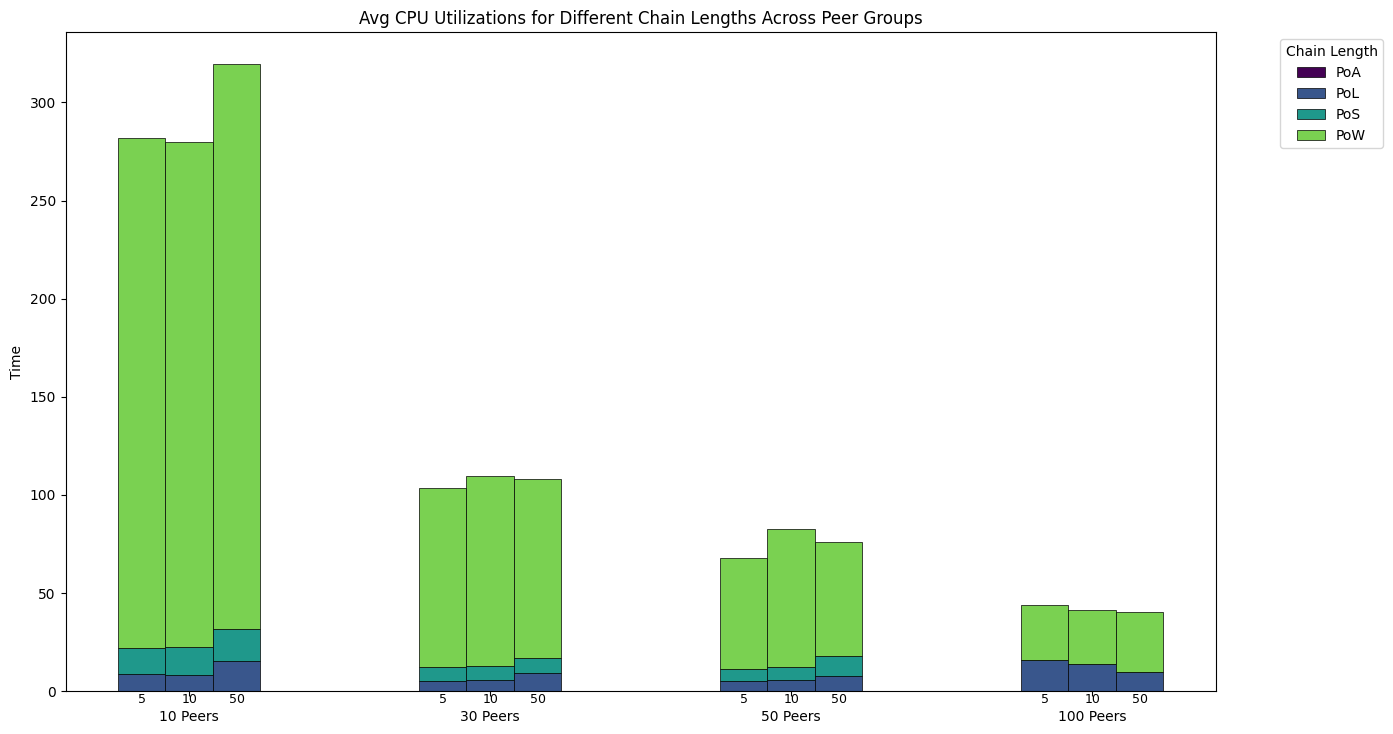

In [9]:
plot_stacked(avg_cpu_df, "Avg CPU Utilizations")